In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn import metrics 
from matplotlib import image
from keras.utils import plot_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import time

In [39]:
train = pd.read_csv('/Users/Dataset/mnist/mnist_train.csv')
test = pd.read_csv('/Users/Dataset/mnist/mnist_test.csv')

In [40]:
train.sample(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
17960,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43162,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Spliting dataset into train and test

In [41]:
xtrain = train.drop(columns=['label'])
ytrain = train['label']

In [42]:
xtest = test.drop(columns=['label'])
ytest = test['label']

In [43]:
xtest

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
knn= KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [48]:
knn_start_time = time.time()
y_pred = knn.predict(xtest)

In [49]:
print('Time taken by KNeighbourClassifier to predict: ', knn_start_time)

Time taken by KNeighbourClassifier to predict:  1689833668.900893


In [50]:
print(f'Accuracy is: {accuracy_score(y_test, y_pred)*100}%')

Accuracy is: 96.88%


#### Now calculation using PCA

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
xtrain_scaler = scaler.fit_transform(xtrain)

In [60]:
xtest_scaler = scaler.transform(xtest)

In [86]:
pca = PCA(n_components=600)

In [87]:
xtrain_pca = pca.fit_transform(xtrain_scaler)

In [88]:
xtest_pca = pca.transform(xtest_scaler)

In [89]:
xtrain_pca.shape

(60000, 600)

In [90]:
knn= KNeighborsClassifier()
knn.fit(xtrain_pca, ytrain)

KNeighborsClassifier()

In [91]:
y_pred_pca=knn.predict(xtest_pca)

In [92]:
accuracy_score(ytest, y_pred_pca)

0.9441

###### Below code will accumulate the accuracy betwnne 1 to 783 PCA

In [ ]:
Acc = []
itr = []
for i in range(1,784):
    pca = PCA(n_components=i)
    xtrain_pca = pca.fit_transform(xtrain_scaler)
    xtest_pca = pca.transform(xtest_scaler)
    knn= KNeighborsClassifier()
    knn.fit(xtrain_pca, ytrain)
    y_pred_pca=knn.predict(xtest_pca)
    print(f'{i} - Accuracy is: {accuracy_score(ytest, y_pred_pca)*100}%')
    Acc.append(accuracy_score(ytest, y_pred_pca))
    itr.append(i)
          

1 - Accuracy is: 25.64%
2 - Accuracy is: 31.929999999999996%
3 - Accuracy is: 51.92%
4 - Accuracy is: 66.81%
5 - Accuracy is: 73.8%
6 - Accuracy is: 83.47%
7 - Accuracy is: 84.54%
8 - Accuracy is: 87.69%
9 - Accuracy is: 88.98%
10 - Accuracy is: 90.75%
11 - Accuracy is: 91.49000000000001%
12 - Accuracy is: 92.04%
13 - Accuracy is: 92.78999999999999%
14 - Accuracy is: 93.73%
15 - Accuracy is: 93.72%
16 - Accuracy is: 93.94%
17 - Accuracy is: 94.02000000000001%
18 - Accuracy is: 94.1%
19 - Accuracy is: 94.66%
20 - Accuracy is: 94.57%
21 - Accuracy is: 94.67%
22 - Accuracy is: 94.71000000000001%
23 - Accuracy is: 94.84%
24 - Accuracy is: 94.95%
25 - Accuracy is: 94.94%
26 - Accuracy is: 94.97%
27 - Accuracy is: 95.02000000000001%
28 - Accuracy is: 95.19999999999999%
29 - Accuracy is: 95.09%
30 - Accuracy is: 95.15%
31 - Accuracy is: 95.32000000000001%
32 - Accuracy is: 95.49%
33 - Accuracy is: 95.39999999999999%
34 - Accuracy is: 95.44%
35 - Accuracy is: 95.74000000000001%
36 - Accuracy i

298 - Accuracy is: 94.99%
299 - Accuracy is: 94.97%
300 - Accuracy is: 94.99%
301 - Accuracy is: 95.02000000000001%
302 - Accuracy is: 94.99%
303 - Accuracy is: 95.00999999999999%
304 - Accuracy is: 95.02000000000001%
305 - Accuracy is: 94.96%
306 - Accuracy is: 94.92%
307 - Accuracy is: 95.02000000000001%
308 - Accuracy is: 94.92%
309 - Accuracy is: 94.96%
310 - Accuracy is: 94.98%
311 - Accuracy is: 95.0%
312 - Accuracy is: 94.92%


###### Other way to find best PCA

In [98]:
pca = PCA(n_components=None)
xtrain_pca = pca.fit_transform(xtrain_scaler)
xtest_pca = pca.transform(xtest_scaler)
knn= KNeighborsClassifier()
knn.fit(xtrain_pca, ytrain)
y_pred_pca=knn.predict(xtest_pca)

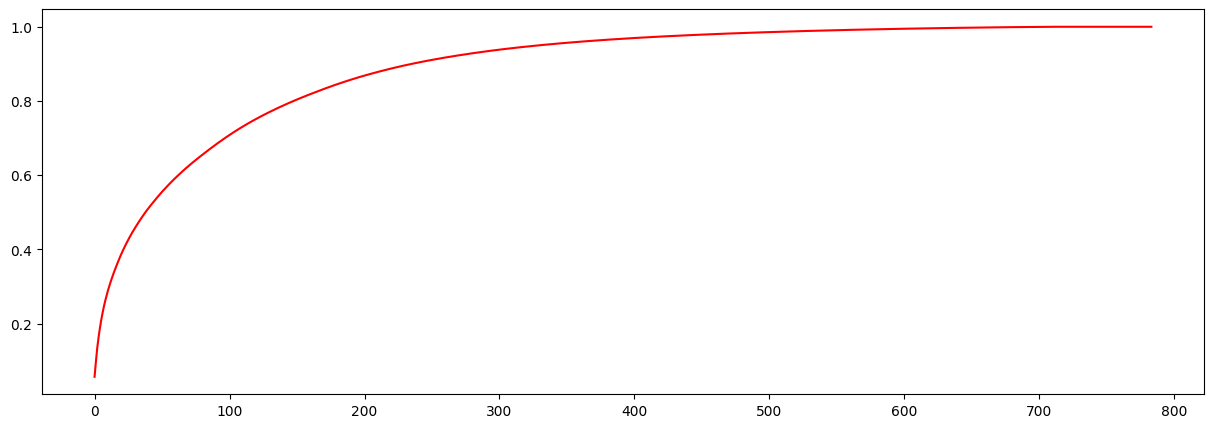

In [135]:
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), c='r')
      
plt.show()